## Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

In [2]:
boston = load_boston()

Создайте датафреймы X и y из этих данных.

In [3]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Масштабируйте данные с помощью StandardScaler.

In [5]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

In [6]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
X_train_scaled.shape, X_train_tsne.shape

((404, 13), (404, 2))

Постройте диаграмму рассеяния на этих данных.

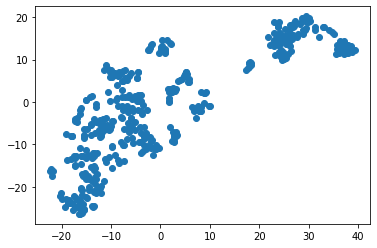

In [7]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

## Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.



In [8]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.


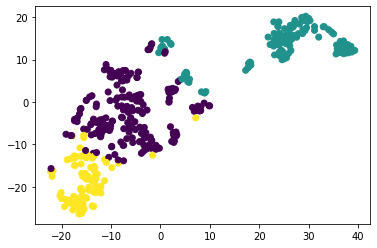

In [9]:
labels_train = kmeans.fit_predict(X_train_scaled)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

Вычислите средние значения price и CRIM в разных кластерах.


In [10]:
y_train[labels_train == 0].mean(), y_train[labels_train == 1].mean(), y_train[labels_train == 2].mean()

(24.958115183246072, 16.165354330708663, 27.78837209302326)

In [11]:
for l in set(labels_train):
    mean_price = y_train[labels_train == l].mean()
    mean_crim = X_train.CRIM[labels_train == l].mean()
    print(f'{l}: price= {mean_price}, crim= {mean_crim}')

0: price= 24.958115183246072, crim= 0.4216602094240837
1: price= 16.165354330708663, crim= 10.797028425196851
2: price= 27.78837209302326, crim= 0.07356558139534884
